# Handling Missing Data


# A. Trade-offs in Missing Data Convention:

* using a mask that globally indicates missing values, or choosing a sentinel value that indicates a missing entry.

* In the masking approach, the mask might be an entirely separate Boolean array, or it might involve appropriation of one bit in the data representation to locally indicate the null status of a value.
    * Use of a separate mask array
requires allocation of an additional Boolean array, which adds overhead in both storage
and computation.
* In the sentinel approach, the sentinel value could be some data-specific convention, such as indicating a missing integer value with –9999 or some rare bit pattern, or it
    could be a more global convention, such as indicating a missing floating-point value
    with NaN (Not a Number), a special value that is part of the IEEE floating-point
    specification.
    * A sentinel value reduces the range of valid values that can be
represented, and may require extra (often nonoptimized) logic in CPU and GPU
arithmetic, because common special values like NaN are not available for all data
types.


# B. Missing Data in Pandas

* Because of these constraints and trade-offs, Pandas has two “modes” of storing and
manipulating null values:
    * The default mode is to use a sentinel-based missing data scheme, with sentinel values NaN or None depending on the type of the data.
    * Alternatively, you can opt in to using the nullable data types (dtypes) Pandas provides,  which results in the creation an accompanying
mask array to track missing entries. These missing entries are then
presented to the user as the special pd.NA value.


### B.1. `None` as a Sentinel Value:

* `None` is a Python object, which means that any array containing `None` must have `dtype=object` —that is, it must be a sequence of Python objects.

* The downside of using `None` in this way is that operations on the data will be done at the Python level, with much more overhead than the typically fast operations seen for arrays with native types.

* For this reason, Pandas does not use `None` as a sentinel in its numerical arrays.

In [1]:
import numpy as np
import pandas as pd

In [2]:
vals1 = np.array([1, None, 2, 3])
vals1

array([1, None, 2, 3], dtype=object)

In [3]:
%timeit np.arange(1E6, dtype=int).sum()

3.13 ms ± 559 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%timeit np.arange(1E6, dtype=object).sum()

85 ms ± 9.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
val1.sum()

NameError: name 'val1' is not defined

### B.2 `NaN`: Missing Numerical Data

* `NaN` is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.
* Regardless of the operation, the result of arithmetic w/ `NaN` will be another `NaN`
* NumPy does provide `NaN`-aware version of aggregations that will ignore these misssing values
* The main downside of `NaN` is that it is specifically a floating-point value; there is no equivalent `NaN` value for integers, strings, or other types.

In [6]:
vals2 = np.array([1, np.nan, 3, 4])
vals2

array([ 1., nan,  3.,  4.])

In [7]:
1 + np.nan

nan

In [8]:
0 * np.nan

nan

In [9]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [10]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

### B.3 `NaN` and `None` in Pandas

* For types that don’t have an available sentinel value, Pandas automatically typecasts when NA values are present.
* 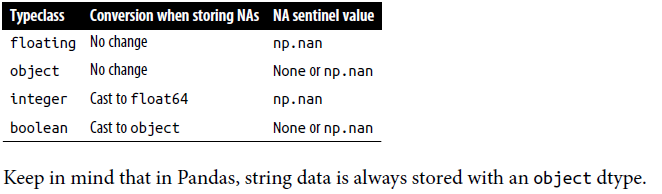

In [11]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [12]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [13]:
x[0] = None

In [18]:
x.sum(axis=0)

1.0

# C. Pandas Nullable Dtypes
* Nullable dtypes :
    * distinguished from regular dtypes by capitalization of their names (e.g., `pd.Int32` versus `np.int32`).
    * Way to represent a true integer array with missing data.


In [15]:
pd.Series([1, np.nan, 2, None, pd.NA], dtype='Int32')

0       1
1    <NA>
2       2
3    <NA>
4    <NA>
dtype: Int32

# D. Operating on Null Values:
* Pandas provides several methods for detecting, removing, and replacing null values in Pandas data structures.
    * `isnull`:
        * Generates a Boolean mask indicating missing values
    * `notnull`:
        * Opposite of `isnull`
    * `dropna`:
        * returns a filtered version of the data
    * `fillna`:
        * returns a copy of the data w/ missing values filled or imputed

### D.1. Detecting Null Values

In [19]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [20]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [21]:
data[data.notnull()]

0        1
2    hello
dtype: object

### D.2. Dropping Null Values

In [22]:
data.dropna()

0        1
2    hello
dtype: object

In [23]:
df = pd.DataFrame([[1, np.nan, 2],
                    [2, 3, 5],
                    [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [24]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [25]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [26]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [27]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [29]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### D.3 Filling Null Values:


In [30]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'), dtype='Int32')
data

a       1
b    <NA>
c       2
d    <NA>
e       3
dtype: Int32

In [31]:
data.fillna(0)

a    1
b    0
c    2
d    0
e    3
dtype: Int32

In [32]:
#forward fill
data.fillna(method='ffill')

a    1
b    1
c    2
d    2
e    3
dtype: Int32

In [33]:
#back fill
data.fillna(method='bfill')

a    1
b    2
c    2
d    3
e    3
dtype: Int32

In [34]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [35]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0
